In [146]:
import math
import numpy as np
def _tiny():
    return np.finfo('float64').eps

def calculate_d3r(rt, last_vt, last_ddt):
    x = (rt - 0.5*last_vt) / (last_ddt + _tiny())
    y = ((last_ddt**2)*(rt - 0.5*last_vt) - 0.5*last_vt*(rt**2)) / (last_ddt**3 + _tiny())
    return (x,y)
def calculate_dsr(rt, last_vt, last_wt):
    delta_vt = rt - last_vt
    delta_wt = rt**2 - last_wt
    return (last_wt * delta_vt - 0.5 * last_vt * delta_wt) / ((last_wt - last_vt**2)**(3/2) + _tiny())

# def calculate_d3r(rt, last_vt, last_ddt):
#     x = (rt - 0.5*last_vt) / (last_ddt + _tiny())
#     y = ((last_ddt**2)*(rt - 0.5*last_vt) - 0.5*last_vt*(rt**2)) / (last_ddt**3 + _tiny())
#     return (x,y)
class RiskAdjusteMetric:
    def __init__(self, last_vt,last_wt, last_ddt, last_dt2,decay_rate):
      self.last_vt = last_vt
      self.last_wt = last_wt
      self.decay_rate=decay_rate
      self.last_ddt = last_ddt
      self.last_dt2 = last_dt2
      self.last_sr = 0
      self.last_ddr = 0
      
      
    def _tiny():
        return np.finfo('float64').eps



    def update_metrics(self, rt):
        # rt = np.log(1+rt)
        dsr = calculate_dsr(rt, self.last_vt, self.last_wt)
        # d3r_cond1, d3r_cond2 = calculate_d3r(rt, self.last_vt, self.last_ddt)
        # d3r = d3r_cond1 if rt > 0 else d3r_cond2

        self.last_vt += self.decay_rate * (rt - self.last_vt)
        self.last_wt += self.decay_rate * (rt**2 - self.last_wt)

        # self.last_dt2 += self.decay_rate * (np.minimum(rt, 0)**2 - self.last_dt2)
        # self.last_ddt = math.sqrt(self.last_dt2)
        self.last_sr += self.decay_rate * dsr
        # self.last_ddr += self.decay_rate * d3r
        return dsr


In [1]:
from pandas import read_csv


df_dow =read_csv('./data/dow.csv')
df =df_dow.copy()
df = df_dow[df_dow.tic.isin( ['AAPL'])]

In [2]:
returns = df['close'].pct_change()

In [44]:
import math
import numpy as np
def _tiny():
    return np.finfo('float64').eps

def calculate_d3r(rt, last_vt, last_ddt):
    x = (rt - 0.5*last_vt) / (last_ddt + _tiny())
    y = ((last_ddt**2)*(rt - 0.5*last_vt) - 0.5*last_vt*(rt**2)) / (last_ddt**3 + _tiny())
    return (x,y)
def calculate_dsr(rt, last_vt, last_wt):
    delta_vt = rt - last_vt
    delta_wt = rt**2 - last_wt
    return (last_wt * delta_vt - 0.5 * last_vt * delta_wt) / ((last_wt - last_vt**2)**(3/2) + _tiny())

# def calculate_d3r(rt, last_vt, last_ddt):
#     x = (rt - 0.5*last_vt) / (last_ddt + _tiny())
#     y = ((last_ddt**2)*(rt - 0.5*last_vt) - 0.5*last_vt*(rt**2)) / (last_ddt**3 + _tiny())
#     return (x,y)
class RiskAdjusteMetric:
    def __init__(self, last_vt,last_wt, last_ddt, last_dt2,decay_rate):
      self.last_vt = last_vt
      self.last_wt = last_wt
      self.decay_rate=decay_rate
      self.last_ddt = last_ddt
      self.last_dt2 = last_dt2
      self.last_sr = 0
      self.last_ddr = 0
      
      
    def _tiny():
        return np.finfo('float64').eps



    def update_metrics(self, rt):
        rt = rt *0.001
        dsr = calculate_dsr(rt, self.last_vt, self.last_wt)
        # d3r_cond1, d3r_cond2 = calculate_d3r(rt, self.last_vt, self.last_ddt)
        # d3r = d3r_cond1 if rt > 0 else d3r_cond2

        self.last_vt += self.decay_rate * (rt - self.last_vt)
        self.last_wt += self.decay_rate * (rt**2 - self.last_wt)

        # self.last_dt2 += self.decay_rate * (np.minimum(rt, 0)**2 - self.last_dt2)
        # self.last_ddt = math.sqrt(self.last_dt2)
        self.last_sr += self.decay_rate * dsr
        # self.last_ddr += self.decay_rate * d3r
        return dsr * self.decay_rate


In [39]:
estimator = RiskAdjusteMetric(0,0,0,0,0.0001)
dsrs = []
for i,item in enumerate(returns[1:]):
 dsrs.append(estimator.update_metrics(item))
print(estimator.last_sr)

0.029342895382690668


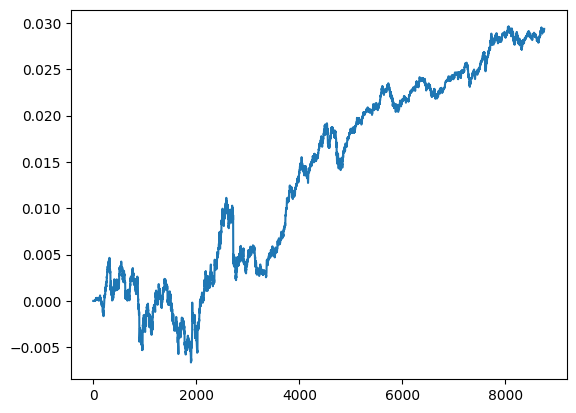

In [42]:
import pandas as pd


plt.plot((pd.Series(dsrs)).cumsum())
plt.show()

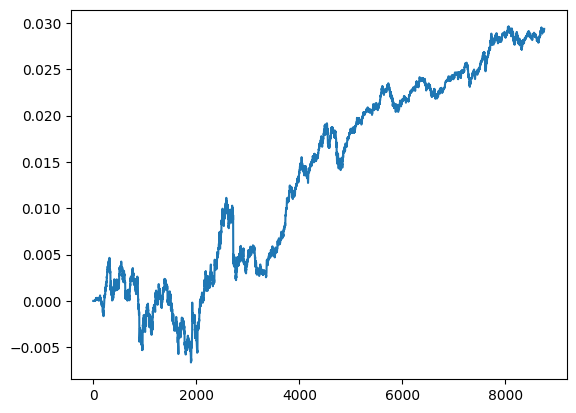

In [45]:
import pandas as pd


plt.plot((pd.Series(dsrs)).cumsum())
plt.show()

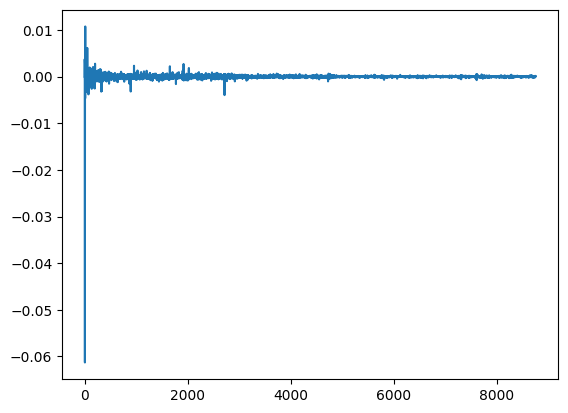

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(dsrs)
plt.show()

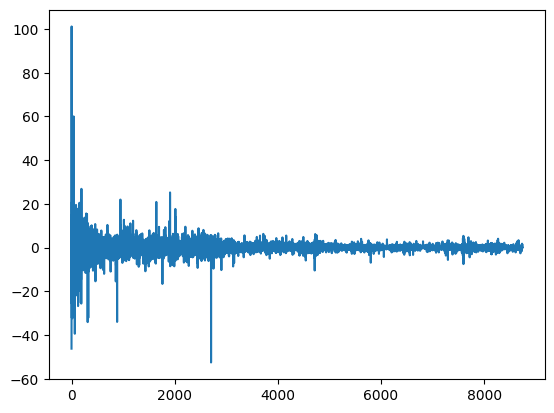

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(dsrs[10:])
plt.show()

In [26]:
df['close'].pct_change()[1:].mean()/df['close'].pct_change()[1:].std()

0.042591706397122536